<a href="https://colab.research.google.com/github/chcwww/ProjectGit/blob/main/method%5CencoderCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get Data

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn import metrics 
from xgboost import XGBClassifier, plot_importance, plot_tree
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import numpy as np
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier()
clf.fit(X_train, y_train)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
import pandas as pd
from sklearn.model_selection import train_test_split
dirThis = '/content/drive/MyDrive/1經濟學/專題/'
sys.path.append(dirThis + 'method/')
!pip install crucio
!pip install category_encoders
from function import *
dt = pd.read_csv(dirThis + 'featureNew/use.csv')
dat = dt.copy()
newdata = dataLoader(dat)

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7438 sha256=d2395c4a19c1edc099bb43bcb4d167535d08f5155c185c3d06be1bc4b5c4674f
  Stored in directory: /root/.cache/pip/wheels/59/bd/aa/41ad56fbb723d36e457b5be74feb992cdac2855a6999ba34a1
Successfully built statistics
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.5 MB/s eta 0:00:00


In [ ]:
Encoder = ['none', 'ordinal', 'onehot', 'target', 'binary', 'cat', 'woe', 'helmert', 'leave', 'hash']
ST = ['none', 'std', 'minmax', 'abs', 'robust', 'power', 'qnormal', 'quantile']

In [ ]:
encode = 'ordinal'
st = 'std'
over = 'none'
X_train, X_test, y_train, y_test = newdata.getSet(encode = encode, st = st, over = over)

encoder : ordinal
standardization : std


In [ ]:
# !wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb2. 
# !ls  
# !dpkg -i cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb 
# !ls /var/cuda-repo-9-0-local | grep .pub
# !apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub
# !apt-get update
# !sudo apt-get install cuda-9.0

In [ ]:
!pip install thundersvm

In [ ]:
import numpy as np
import pandas as pd
#from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
#from sklearn.model_selection import GridSearchCV
from sklearn.utils import parallel_backend
from thundersvm import SVC
 
import torch
#model = svm.SVC(kernel='linear',class_weight ='balanced', random_state = 12)
model = SVC(kernel='linear')

clf =model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.metrics import classification_report
from sklearn import linear_model
model = linear_model.RidgeClassifierCV()

clf =model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.84     23324
           1       0.60      0.04      0.08      8688

    accuracy                           0.73     32012
   macro avg       0.67      0.52      0.46     32012
weighted avg       0.70      0.73      0.64     32012



# CV encode

In [ ]:
from sklearn import linear_model
combName = []
combAUC = []
combF1 = []
combPred = []
combFPR = []
combTPR = []


for SS in ST :
  for EE in Encoder :
    name = EE + '_' + SS
    combName.append(name)
    encode = EE
    st = SS
    over = 'none'
    X_train, X_test, y_train, y_test = newdata.getSet(encode = encode, st = st, over = over)
    if(encode == 'none') :
      X_train = X_train.iloc[:, 4:]
      X_test = X_test.iloc[:, 4:]

    xg5 = linear_model.RidgeClassifierCV()
    xg5.fit(X_train, y_train)

    pred = xg5.decision_function(X_test)

    combPred.append(pred)

    auc = roc_auc_score(y_test, pred)
    
    combAUC.append(auc)

    fpr, tpr, thresholds = roc_curve(y_test, pred)

    combFPR.append(fpr)
    combTPR.append(tpr)

    pred = xg5.predict(X_test)
    f1 = f1_score(y_test, pred)
    combF1.append(f1)

    print("\n####################################################")
    print(f'Name: {name}\nAUC: {auc*100:.4f}  F1: {f1*100:.4f}')
    print("####################################################\n")


####################################################
Name: none_none
AUC: 64.5309  F1: 8.7742
####################################################

encoder : ordinal

####################################################
Name: ordinal_none
AUC: 65.2444  F1: 10.7347
####################################################

encoder : onehot

####################################################
Name: onehot_none
AUC: 70.8083  F1: 30.4053
####################################################

encoder : target

####################################################
Name: target_none
AUC: 70.0822  F1: 27.0994
####################################################

encoder : binary

####################################################
Name: binary_none
AUC: 67.6926  F1: 15.2362
####################################################

encoder : cat

####################################################
Name: cat_none
AUC: 68.9944  F1: 25.8231
####################################################

encoder : 

In [ ]:
idx1 = np.argmax(combAUC)
print(combName[idx1])
idx2 = np.argmax(combF1)
print(combName[idx2])
print(combF1[idx1])
print(combF1[idx2])
print(combAUC[idx1])
print(combAUC[idx2])
combName[np.argmax(np.array(combF1) + np.array(combAUC))]

In [ ]:
cvencoder = pd.concat([pd.DataFrame(combName), pd.DataFrame(combAUC), pd.DataFrame(combF1)], axis = 1)
cvencoder.columns = ['name', 'auc', 'f1']
cvencoder.to_csv(dirThis + 'predictResult/SVM/cvOriginal_auc_f1_svm.csv', index = False)

In [ ]:
cvEnPred = pd.concat([pd.DataFrame(combPred).T, pd.DataFrame(y_test)], axis = 1)
cvEnPred.columns = combName + ['repeater']
cvEnPred.to_csv(dirThis + 'predictResult/SVM/cvOriginal_pred_svm.csv', index = False)

# ROC contrast

In [ ]:
predauc = pd.read_csv(dirThis + 'predictResult/cvEncoder_auc_f1_logistic.csv')

In [ ]:
aucc = predauc.set_index("name").T.iloc[:2, :]

In [ ]:
predtpr = pd.read_csv(dirThis + 'predictResult/cvEncoder_tpr_logistic.csv')
predfpr = pd.read_csv(dirThis + 'predictResult/cvEncoder_fpr_logistic.csv')

In [ ]:
predtpr['helmert_quantile'].dropna()

0        0.000000
1        0.000115
2        0.000115
3        0.001381
4        0.001381
           ...   
12319         NaN
12320         NaN
12321         NaN
12322         NaN
12323         NaN
Name: helmert_quantile, Length: 12324, dtype: float64

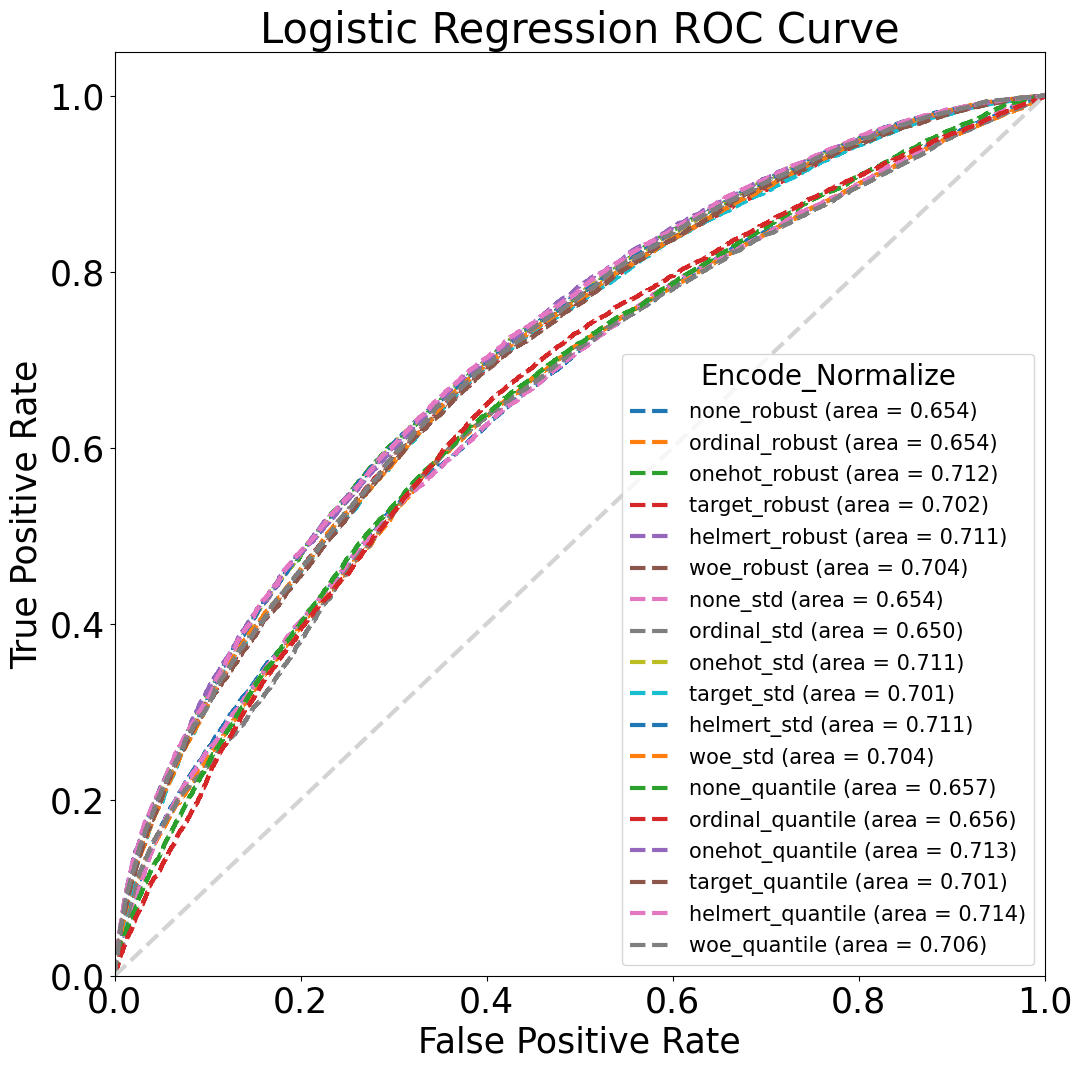

In [ ]:
plt.figure(figsize = (12, 12))

for k in ['none', 'ordinal', 'onehot', 'target', 'helmert', 'woe'] :
  name = k + '_robust'
  auc = aucc[name][0]
  fpr = predfpr[name].dropna().to_numpy()
  tpr = predtpr[name].dropna().to_numpy()
  plt.plot(fpr, tpr, '--', label = name + ' (area = %0.3f)' % auc, linewidth = 3)

for k in ['none', 'ordinal', 'onehot', 'target', 'helmert', 'woe'] :
  name = k + '_std'
  auc = aucc[name][0]
  fpr = predfpr[name].dropna().to_numpy()
  tpr = predtpr[name].dropna().to_numpy()
  plt.plot(fpr, tpr, '--', label = name + ' (area = %0.3f)' % auc, linewidth = 3)

for k in ['none', 'ordinal', 'onehot', 'target', 'helmert', 'woe'] :
  name = k + '_quantile'
  auc = aucc[name][0]
  fpr = predfpr[name].dropna().to_numpy()
  tpr = predtpr[name].dropna().to_numpy()
  plt.plot(fpr, tpr, '--', label = name + ' (area = %0.3f)' % auc, linewidth = 3)

plt.rc('font', size=25)
plt.plot([0, 1], [0, 1],'--', linewidth = 3, color='lightgrey')
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right", title = "Encode_Normalize", title_fontsize = 20, prop={'size': 15})
plt.show()

# CV resample

In [ ]:
Resample = ['none', 'tomek', 'enn', 'smtomek', 'smenn']
encode = 'helmert'
st = 'quantile'
over = 'none'

In [ ]:
combName = []
combAUC = []
combF1 = []
combPred = []

X_train1, X_test, y_train1, y_test = newdata.getSet(encode = encode, st = st, over = over)

for RE in Resample :
  name = RE + '_' + encode + '_' + st
  combName.append(name)

  if(RE == 'tomek') :
    resample = TomekLinks(sampling_strategy='majority')
  elif(RE == 'smtomek') :
    resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
  elif(RE == 'enn') :
    resample = EditedNearestNeighbours(sampling_strategy='majority')
  else :
    resample = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))

  if(RE != 'none') :
    X_train, y_train = resample.fit_resample(X_train1, y_train1)

  xg5 = linear_model.RidgeClassifierCV()
  xg5.fit(X_train, y_train)

  pred = xg5.decision_function(X_test)

  combPred.append(pred)

  auc = roc_auc_score(y_test, pred)
  
  combAUC.append(auc)

  pred = xg5.predict(X_test)
  f1 = f1_score(y_test, pred)
  combF1.append(f1)

  print("\n####################################################")
  print(f'Name: {name}\nAUC: {auc*100:.4f}  F1: {f1*100:.4f}')
  print("####################################################\n")

encoder : helmert
standardization : quantile

####################################################
Name: none_helmert_quantile
AUC: 71.0290  F1: 26.4046
####################################################

encoder : helmert
standardization : quantile

####################################################
Name: tomek_helmert_quantile
AUC: 71.1531  F1: 38.6647
####################################################

encoder : helmert
standardization : quantile

####################################################
Name: enn_helmert_quantile
AUC: 71.2066  F1: 50.0000
####################################################

encoder : helmert
standardization : quantile

####################################################
Name: smtomek_helmert_quantile
AUC: 70.9782  F1: 49.7001
####################################################

encoder : helmert
standardization : quantile

####################################################
Name: smenn_helmert_quantile
AUC: 70.9703  F1: 48.2258
###############

In [ ]:
cvencoder = pd.concat([pd.DataFrame(combName), pd.DataFrame(combAUC), pd.DataFrame(combF1)], axis = 1)
cvencoder.columns = ['name', 'auc', 'f1']
cvencoder.to_csv(dirThis + 'predictResult/SVM/cvResample_auc_f1_svm.csv', index = False)

In [ ]:
cvEnPred = pd.concat([pd.DataFrame(combPred).T, pd.DataFrame(y_test)], axis = 1)
cvEnPred.columns = combName + ['repeater']
cvEnPred.to_csv(dirThis + 'predictResult/SVM/cvResample_pred_svm.csv', index = False)

# Each Offer

In [ ]:
X_train.buy_total_clv.mean()

NameError: ignored

In [ ]:
from category_encoders import *
encode = 'none'
st = 'std'
over = 'none'
X_train, X_test, y_train, y_test = newdata.getSet(encode = encode, st = st, over = over)
offer = X_train.offer.unique()
encoder = OneHotEncoder(cols = ['chain', 'market']).fit(X_train, y_train)
trainSet = encoder.transform(X_train)
testSet = encoder.transform(X_test)
eachOffer = pd.concat([trainSet, y_train], axis = 1).groupby("offer")
testOffer = pd.concat([testSet, y_test], axis = 1).groupby("offer")

standardization : std


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
lll = testOffer.get_group(1200582)

In [ ]:
pca_ = PCA(n_components = 2).fit(lll)
kkk = pd.DataFrame(pca_.transform(lll))

In [ ]:
pca_.components_

array([[ 1.11022302e-16, -2.22044605e-16, -6.98878532e-04,
        -2.33070021e-04,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -3.20654809e-03,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -1.17549435e-38,
         4.59177481e-41, -2.51085224e-03, -7.94734294e-04,
        -9.38290121e-04, -3.13795485e-03, -1.22217522e-03,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -9.87916238e-04,  0.00000000e+00, -1.69658280e-03,
         0.00000000e+00,  0.00000000e+00, -3.08920072e-04,
        -2.57155386e-03,  3.13274040e-03, -2.88378099e-04,
        -4.06023754e-04,  0.00000000e+00, -1.80403163e-03,
         3.66954626e-05,  0.00000000e+00, -8.94124487e-04,
        -3.98011209e-03,  0.00000000e+00,  1.32392877e-02,
         0.00000000e+00,  0.00000000e+00,  2.71308000e-03,
         0.00000000e+00, -1.09188506e-03,  0.00000000e+00,
        -4.25616491e-03,  2.46573593e-02, -5.97825558e-0

In [ ]:
combName = []
combModel = []

opts = {
    "tol" : 1e-6,
    "max_iter" : int(1e6),
    "verbose" : 0,
    "solver" : "liblinear",
        }

for nn in offer :
  combName.append(nn)
  
  takeTrain = eachOffer.get_group(nn)
  takeX = takeTrain.drop(['repeater', 'offer'], axis = 1)
  takeY = takeTrain['repeater']

  resample = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))
  takeX, takeY = resample.fit_resample(takeX, takeY)

  xg5 = LogisticRegression(**opts)
  xg5.fit(takeX, takeY)
  combModel.append(xg5)

  pred = xg5.predict_proba(takeX)[:, 1]

  auc = roc_auc_score(takeY, pred)

  fpr, tpr, thresholds = roc_curve(takeY, pred)

  pred = np.around(pred,0).astype(int)
  f1 = f1_score(takeY, pred)

  print("\n####################################################")
  print(f'Name: {nn}\nAUC: {auc*100:.4f}  F1: {f1*100:.4f}')
  print("####################################################\n")


####################################################
Name: 1208503
AUC: 86.5433  F1: 88.9134
####################################################


####################################################
Name: 1197502
AUC: 80.0805  F1: 86.0629
####################################################


####################################################
Name: 1208329
AUC: 85.3270  F1: 89.4420
####################################################


####################################################
Name: 1204822
AUC: 87.2740  F1: 87.2796
####################################################


####################################################
Name: 1208501
AUC: 72.6255  F1: 90.5059
####################################################


####################################################
Name: 1204576
AUC: 83.7585  F1: 89.3810
####################################################


####################################################
Name: 1203052
AUC: 76.5316  F1: 90.3184
##################

In [ ]:
combOffer = []
overPred = []
overAUC = []

offerTest = X_test.offer.unique()
name = offerTest[0]
for name in offerTest :
  combPred = []
  saveName = []
  combAUC = []
  takeTest = testOffer.get_group(name)
  testX = takeTest.drop(['repeater', 'offer'], axis = 1)
  testY = takeTest['repeater']
  for k, model in enumerate(combModel) :
    pred = model.predict_proba(testX)[:, 1]
    combPred.append(pred)

    auc = roc_auc_score(testY, pred)
    combAUC.append(auc)
    saveName.append(str(name) + '_' + str(combName[k]))
  overAUC.append(combAUC)
  overPred.append(combPred)
  predData = pd.DataFrame(combPred).T
  predData.columns = saveName
  predData = pd.concat([predData.reset_index(drop = True), testY.reset_index(drop = True)], axis = 1)
  # predData.to_csv(dirThis + 'eachOFFER/trOFFER_pred_' + str(name) + '.csv', index = False)
aucData = pd.DataFrame(overAUC).T
aucData = pd.concat([pd.DataFrame(offer), aucData], axis = 1)
aucData.columns = ['model'] + list(offerTest)
# aucData.to_csv(dirThis + 'eachOFFER/trOFFER_AUC.csv', index = False)

In [ ]:
takeee = []
for k in np.arange(1, 25) :
  app = aucData.iloc[:, k]
  takeee.append(max(app))

In [ ]:
takeee

In [ ]:
np.array(takeee).mean()

0.6337756270096997

In [ ]:
opts = {
    "tol" : 1e-6,
    "max_iter" : int(1e6),
    "verbose" : 0,
    "solver" : "liblinear",
        }

encode = 'onehot'
st = 'std'
over = 'none'
X_train, X_test, y_train, y_test = newdata.getSet(encode = encode, st = st, over = over)

resample = EditedNearestNeighbours(sampling_strategy='majority')
takeX, takeY = resample.fit_resample(X_train, y_train)

xg5 = LogisticRegression(**opts)
xg5.fit(takeX, takeY)

pred = xg5.predict_proba(X_test)[:, 1]

# pred = np.around(pred,0).astype(int)
print(roc_auc_score(y_test, pred))

encoder : onehot
standardization : std
0.7114974566187959


# Plot

In [ ]:
dt = pd.read_csv(dirThis + 'eachOFFER/trOFFER_AUC.csv')

In [ ]:
col = dt.columns

In [ ]:
ll.columns[1]

'1197502'

In [ ]:
dt

In [ ]:
dt[col[0]].shape

(24,)

In [ ]:
np.where(dt[col[0]].astype(str) == ll.columns[1])[0][0]

1

In [ ]:
best = []
mine = []
auc = []
myname = []
other = []

for i in range(dt[col[0]].shape[0]) :
  ll = dt[[col[0], col[i]]]
  try :
    place = np.where(dt[col[0]].astype(str) == ll.columns[1])[0][0]
    other.append(dt[col[0]][place])
  except :
    place = -1
    other.append(None)
  
  maxplace = np.argmax(dt[col[i]])
  place

In [ ]:
other

[1197502,
 1208252,
 1208329,
 1204822,
 1208251,
 1204821,
 1203052,
 1204576,
 1199258,
 1208501,
 1199256,
 1200581,
 1198274,
 1200578,
 1198273,
 1194044,
 1200582,
 1208503,
 1198272,
 1200579,
 1200988,
 1198271,
 1200584]

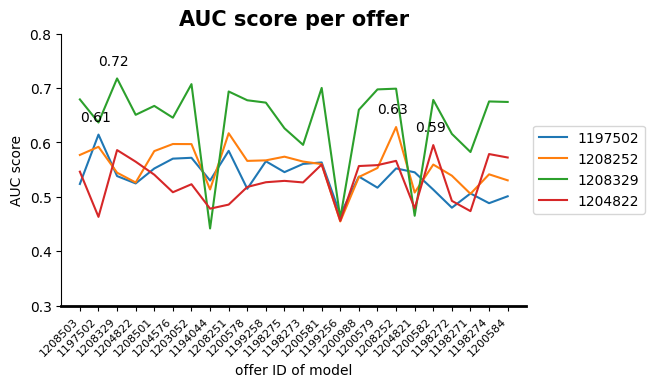

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
app=aucData.iloc[:, 1]
ban=aucData.iloc[:, 2]
x=np.arange(1, len(aucData.iloc[:, 0]) + 1)
fig=plt.figure(num=1,figsize=(6,4))
# plt.rcParams["font.sans-serif"] = "Microsoft JhengHei"
# plt.rcParams['font.sans-serif'] = ['SimHei']
ax=fig.add_subplot(111)

for k in np.arange(1, 5) :
  app = aucData.iloc[:, k]
  ax.plot(x,app,label=aucData.columns[k])
  ax.text(x[np.argmax(app)]-1, max(app) + 0.025, str(round(max(app), 2)),fontsize=10,alpha=1)
# ax.plot(x,ban,"c-d",label=aucData.columns[2])
# ax.text(x[np.argmax(ban)]-1, max(ban) + 0.025, str(round(max(ban), 2)),fontsize=10,color="g",alpha=1)

ax.set_xlim([0, len(aucData.iloc[:, 0]) + 1])
ax.set_ylim([0.3, 0.8])
ax.set_xticks(np.linspace(1, len(aucData.iloc[:, 0]), num = len(aucData.iloc[:, 0])))
# ax.set_yticks(np.linspace(50,100,6))#可调控字体大小，样式，
ax.set_xticklabels(aucData.iloc[:, 0], fontsize=8)
# # ax.set_yticklabels(["50kg","60kg","70kg","80kg","90kg","100kg"])

# ax.tick_params(left=False,pad=8,direction="in",length=2,width=3,color="b",labelsize=12)
# ax.tick_params("x",labelrotation=10)#类标旋转


ax.set_xlabel("offer ID of model")#添加x轴坐标标签，后面看来没必要会删除它，这里只是为了演示一下。
ax.set_ylabel("AUC score")#添加y轴标签，设置字体大小为16，这里也可以设字体样式与颜色

ax.set_title("AUC score per offer", fontsize=15, fontweight='bold')

# #ax.spines["left"].set_color("darkblue")#设置左轴的颜色
ax.spines["bottom"].set_linewidth(2)#底轴线条宽度设置

ax.spines["top"].set_visible(False)#上轴不显示
ax.spines["right"].set_visible(False)
# ax.spines["left"].set_visible(False)
# ax.text(6,86,"max:90",fontsize=12,alpha=1)

# ax.annotate(s="min:70",xy=(1,70),xytext=(1.3,66),arrowprops=dict(facecolor="y",shrink=0.05,\
#                                                               headwidth=12,headlength=6,width=4\
#                                                                 ),fontsize=12)

# ax.legend(labelspacing=1,handlelength=3,fontsize=5,shadow=True)

ax.legend(loc='center left', bbox_to_anchor=(1, .5))
fig.autofmt_xdate(rotation = 45)
plt.savefig(dirThis + 'eachOFFER/trOFFER_figure.png', bbox_inches='tight', dpi=1000)
# plt.savefig(dirThis + 'eachOFFER/trOFFER_figure.png')
plt.show()

# New Check

In [ ]:
X_train, X_test, y_train, y_test = newdata.getSet(encode = 'woe', st = 'std', over = 'none')

resample = EditedNearestNeighbours(sampling_strategy='majority')

X_train, y_train = resample.fit_resample(X_train, y_train)

encoder : woe
standardization : quantile


In [ ]:
max_depth = [3, 6, 10, 20, 50]
learning_rate=[0.001, 0.005, 0.01, 0.1, 0.2]
colsample_bytree = [0.4, 0.6, 0.8]
subsample = [0.4, 0.6, 0.8]
min_child_weight = [int(x) for x in np.linspace(1, 10, 10)]
gamma = [0.1, 1, 5, 10]
reg_alpha = [1e-5, 1e-2, 0.1, 1, 100]
tree_method = []
random_grid = { 
    'max_depth': max_depth,
    'learning_rate': learning_rate,
    'colsample_bytree': colsample_bytree, 
    'tree_method' : ['gpu_hist'],
    'min_child_weight' : min_child_weight,
    'reg_alpha' : reg_alpha,
    'subsample' : subsample 
    }

In [ ]:
xg4 = XGBClassifier()

xg_random = RandomizedSearchCV( \
      estimator = xg4, param_distributions=random_grid,
      n_iter = 100, cv = 3, verbose = 2, n_jobs = -1, 
      scoring = 'roc_auc')
xg_random.fit(X_train, y_train)
xg_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'tree_method': 'gpu_hist',
 'subsample': 0.6,
 'reg_alpha': 0.1,
 'min_child_weight': 6,
 'max_depth': 20,
 'learning_rate': 0.01,
 'colsample_bytree': 0.6}

In [ ]:
dtrain = xgb.DMatrix(X_train, y_train)
params = {
    'booster': 'gbtree', 'objective': 'binary:logistic', 'tree_method': 'gpu_hist',
    'subsample': 0.6,
    'reg_alpha': 0.1,
    'min_child_weight': 6,
    'max_depth': 20,
    'learning_rate': 0.01,
    'colsample_bytree': 0.6
}

num_rounds = 500
xg5 = xgb.train(params, dtrain, num_rounds)

x_test = xgb.DMatrix(X_test)
pred = xg5.predict(x_test)
print(f"AUC score: {roc_auc_score(y_test, pred)*100:.4f}%")

pred = np.around(pred, 0).astype(int)
print('\n\nTest Result:\n')
print(f"Accuracy Score: {accuracy_score(y_test, pred)*100:.4f}%")
print(f"Precision Score: {precision_score(y_test, pred)*100:.4f}%")
print(f"Recall Score: {recall_score(y_test, pred)*100:.4f}%")
print(f"F1 score: {f1_score(y_test, pred)*100:.4f}%")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, pred)}")
print(classification_report(y_test, pred))

AUC score: 71.6208%


Test Result:

Accuracy Score: 65.2880%
Precision Score: 41.3106%
Recall Score: 66.3214%
F1 score: 50.9101%
Confusion Matrix:
 [[15138  8186]
 [ 2926  5762]]
              precision    recall  f1-score   support

           0       0.84      0.65      0.73     23324
           1       0.41      0.66      0.51      8688

    accuracy                           0.65     32012
   macro avg       0.63      0.66      0.62     32012
weighted avg       0.72      0.65      0.67     32012



# LASSO

In [ ]:
encode = 'none'
st = 'std'
over = 'none'
X_std, X_teststd, y_std, y_teststd = newdata.getSet(encode = encode, st = st, over = over)
sel = np.array(X_std.columns[np.where(X_std.columns=='offervalue')[0][0]:])

standardization : std


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

kk = SelectFromModel(LogisticRegression(penalty="l2", C=0.1)).fit(X_std[sel], y_std)
kk

SelectFromModel(estimator=LogisticRegression(C=0.1))

In [ ]:
sel[kk.get_support()]

array(['buy_total_amount', 'buy_total_avgamount', 'buy_total_freq',
       'buy_total_CT', 'buy_total_OZ_30', 'buy_total_LT_30',
       'buy_total_amount_60', 'buy_total_amount_90', 'buy_total_OZ_90',
       'buy_total_OZ_120', 'buy_total_amount_150', 'buy_total_OZ_150',
       'buy_total_amount_180', 'buy_company_amount', 'buy_company_freq',
       'buy_company_OZ', 'buy_brand_amount', 'buy_brand_avgamount',
       'buy_brand_freq', 'buy_brand_daydiff', 'buy_brand_CT',
       'buy_category_amount', 'buy_category_avgamount',
       'buy_category_freq', 'buy_category_OZ', 'buy_company_OZ_30',
       'buy_company_LT_30', 'buy_brand_OZ_30', 'buy_brand_LT_30',
       'buy_category_OZ_30', 'buy_category_LT_30',
       'buy_company_amount_60', 'buy_brand_amount_60',
       'buy_category_amount_60', 'buy_company_amount_90',
       'buy_company_OZ_90', 'buy_brand_amount_90', 'buy_brand_OZ_90',
       'buy_category_amount_90', 'buy_category_OZ_90',
       'buy_company_OZ_120', 'buy_brand_OZ_120

In [ ]:
opts = {
    "tol" : 1e-6,
    "max_iter" : int(1e6),
    "verbose" : 0,
    "solver" : "liblinear",
        }

resample = EditedNearestNeighbours(sampling_strategy='majority')
takeX, takeY = resample.fit_resample(kk.transform(X_std[sel]), y_std)

xg5 = LogisticRegression(**opts)
xg5.fit(takeX, takeY)

pred = xg5.predict_proba(kk.transform(X_teststd[sel]))[:, 1]

# pred = np.around(pred,0).astype(int)
print(roc_auc_score(y_teststd, pred))

ValueError: ignored

In [ ]:
pred = xg5.predict_proba((X_teststd[sel]))[:, 1]

# pred = np.around(pred,0).astype(int)
print(roc_auc_score(y_teststd, pred))

0.6544783387901332


In [ ]:
pred = xg5.predict_proba((X_teststd[['buy_total_amount', 'buy_total_avgamount', 'buy_total_freq',
       'buy_total_CT', 'buy_total_OZ_30', 'buy_total_LT_30',
       'buy_total_amount_60', 'buy_total_amount_90', 'buy_total_OZ_90',
       'buy_total_OZ_120', 'buy_total_amount_150', 'buy_total_OZ_150',
       'buy_total_amount_180', 'buy_company_amount', 'buy_company_freq',
       'buy_company_OZ', 'buy_brand_amount', 'buy_brand_avgamount',
       'buy_brand_freq', 'buy_brand_daydiff', 'buy_brand_CT',
       'buy_category_amount', 'buy_category_avgamount',
       'buy_category_freq', 'buy_category_OZ', 'buy_company_OZ_30',
       'buy_company_LT_30', 'buy_brand_OZ_30', 'buy_brand_LT_30',
       'buy_category_OZ_30', 'buy_category_LT_30',
       'buy_company_amount_60', 'buy_brand_amount_60',
       'buy_category_amount_60', 'buy_company_amount_90',
       'buy_company_OZ_90', 'buy_brand_amount_90', 'buy_brand_OZ_90',
       'buy_category_amount_90', 'buy_category_OZ_90',
       'buy_company_OZ_120', 'buy_brand_OZ_120', 'buy_category_OZ_120',
       'buy_company_amount_150', 'buy_company_OZ_150',
       'buy_brand_amount_150', 'buy_brand_OZ_150',
       'buy_category_amount_150', 'buy_category_OZ_150',
       'buy_company_amount_180', 'buy_brand_amount_180',
       'buy_category_amount_180', 'not_buy_company', 'not_buy_brand',
       'not_buy_category', 'not_buy_company_brand',
       'not_buy_company_category', 'not_buy_brand_category',
       'buy_total_clv']]))[:, 1]

# pred = np.around(pred,0).astype(int)
print(roc_auc_score(y_teststd, pred))

0.6516903451396344
